### Demo Notebook: Visualizing MNIST data

*Author:* Maximilian Matthe (Goehte University Frankfurt)

*This version:* 12/13/2018

This is a quick demonstration, how interactive Jupyter Notebooks could be applied in an introductory data science course.

----
## 0. Introduction:

The aim of this demonstration is to visualize structure high-dimensional data.

We will compare two techniques: 
- PCA
- t-SNE


----
## 1. Getting the Data

We import the MNIST data set, available from the *sklearn* library (thus, no need to download it manually).

Data comes as a "bunch" object, from which we extract:
- the features X (RGB pixel values)
- the target $y \in \{0, ..., 9\}$

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


All in all we have 70,000 observations with 784 features (= 28*28 pixels) each

In [2]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y, mnist = None, None, None

print('Size of the dataframe: {} \n'.format(df.shape))
print("Different values of target variable: {}".format(df.label.unique()))

Size of the dataframe: (70000, 785) 

Different values of target variable: ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']


----
## 2. Explore the Data

First, let's take a look at some randomlly selected observations.

<Figure size 432x288 with 0 Axes>

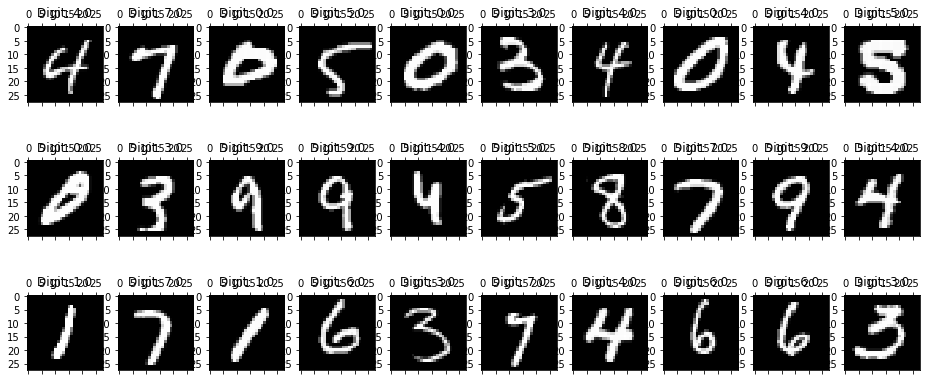

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

----
## 3. Visualizing the Data

### 3.1 PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


#### Visualization with GGPlot from R

For testing purpose, we use the "ggplot" library for visualization.

Ggplot comes from R and is not part of a standard Python environment. Thus, it serves as a good test if code still runs in the browser independent of local setups.

/Users/maximilian_matthe/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/maximilian_matthe/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/maximilian_matthe/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array 

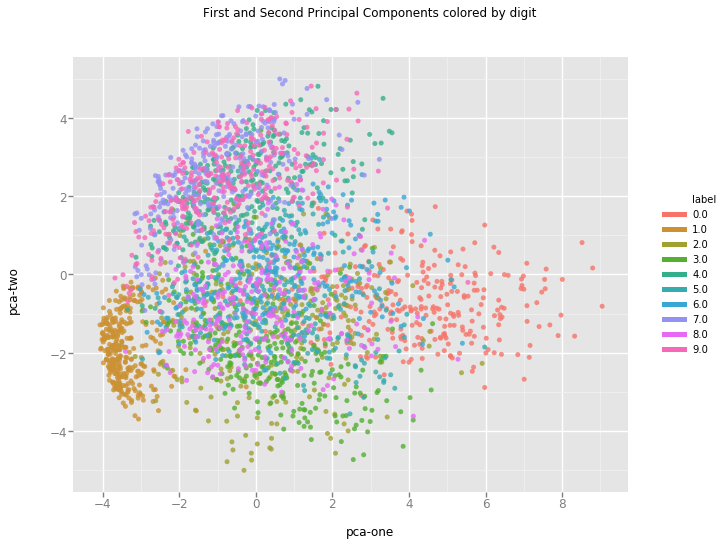

<ggplot: (287176789)>

In [8]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=25,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [ ]:
del pca, pca_result

### 3.2 T-SNE

To speed up the computation time, we only compute the configuration for a random sub-sample.

You can control the size of the sample by adjusting *n_sne*.

In [9]:
from sklearn.manifold import TSNE

n_sne = 2000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done!')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.086s...
[t-SNE] Computed neighbors for 2000 samples in 4.764s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.635073
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.221100
[t-SNE] Error after 500 iterations: 1.208297
t-SNE done!


In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [ ]:
del tsne, tsne_results, df_tsne

## 3.3 TSNE with pre-PCA 

Some implementations of t-SNE pre-compute a PCA (with 50 components) before running t-SNE. 

Let's compare this approach to the pure t-SNE above.

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

In [ ]:
n_sne = 2000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds')

In [ ]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart